In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, triang

# Sigma theoretical vs. empirical

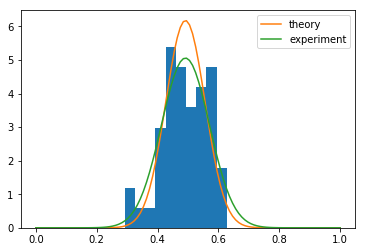

In [116]:
N = 50
Navg = 20
samples = np.random.rand(N, Navg)
means = samples.mean(axis=1)
sigmaThr = (1/12/Navg)**.5
meanMn = means.mean()
sigmaMn = means.std()/(N-1)*N

x = np.linspace(0,1,100)
y = norm.pdf(x,meanMn, sigmaThr)
y_exp = norm.pdf(x,meanMn, sigmaMn)
plt.hist(means, density=True)
plt.plot(x,y, label='theory')
plt.plot(x,y_exp, label='experiment')
plt.legend()
plt.show()

# Estimated confidence interval

In [53]:
N = 10
Navg = 20
samples = np.random.rand(N, Navg)
means = samples.mean(axis=1)
sigmaThr = (1/12/Navg)**.5
meanMn = means.mean()
sigmaMn = means.std()/(N-1)*N

In [54]:
for i in range(N):
    print('{}. {}\t-\t{}'.format(i+1, samples[i].mean()- 1.96*sigmaThr, samples[i].mean() + 1.96*sigmaThr))

1. 0.35918649360913	-	0.612221405561348
2. 0.4085358268166336	-	0.6615707387688515
3. 0.327889430762494	-	0.5809243427147118
4. 0.339857291737067	-	0.592892203689285
5. 0.4735505383034385	-	0.7265854502556565
6. 0.4431565196211893	-	0.6961914315734072
7. 0.3972017269018072	-	0.6502366388540252
8. 0.43155092277560836	-	0.6845858347278263
9. 0.4141120761927959	-	0.6671469881450138
10. 0.39967122410641587	-	0.6527061360586338


# Confidence interval over N samples

In [55]:
lb = meanMn - 1.96*sigmaMn
ub = meanMn + 1.96*sigmaMn
print('{} - {}'.format( lb, ub))

0.4309925997793199 - 0.620984722338214


# Probability of mean value falling into the confidence interval

In [89]:
N = 1000
Navg = 20
samples = np.random.rand(N, Navg)
means = samples.mean(axis=1)
meanMn = means.mean()
sigmaMn = means.std()/(N-1)*N
lb = meanMn - 1.96*sigmaMn
ub = meanMn + 1.96*sigmaMn

print('Probability =',means[(means<ub) & (means>lb)].size/means.size)

Probability = 0.948


# Triangular distribution

In [140]:
N = 20
Navg = 20
a, b, c = 0, 1, .4
samples_tri = np.random.triangular(a,c,b,(N,Navg))
sigmaThr = ((a**2+b**2+c**2-a*b-a*c-b*c)/18/Navg)**.5
means = samples_tri.mean(axis=1)
meanMn = means.mean()
sigmaMn = means.std()/(N-1)*N

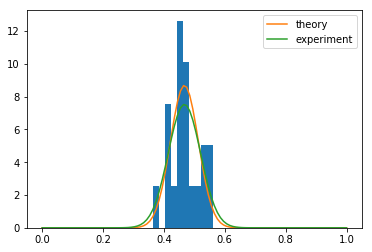

In [141]:
# plt.hist(samples_tri[0])


x = np.linspace(0,1,100)
y = norm.pdf(x,meanMn, sigmaThr)
y_exp = norm.pdf(x,meanMn, sigmaMn)
plt.hist(means, density=True)
plt.plot(x,y, label='theory')
plt.plot(x,y_exp, label='experiment')
plt.legend()
plt.show()

# Probability of mean value falling into the confidence interval

In [201]:
N = 1000
Navg = 50
a, b, c = 0, 1, .4
samples_tri = np.random.triangular(a,c,b,(N,Navg))
sigmaThr = ((a**2+b**2+c**2-a*b-a*c-b*c)/18/Navg)**.5
means = samples_tri.mean(axis=1)
meanMn = means.mean()
sigmaMn = means.std()/(N-1)*N
lb = meanMn - 1.96*sigmaMn
ub = meanMn + 1.96*sigmaMn

print('Probability =',means[(means<ub) & (means>lb)].size/means.size)

Probability = 0.955


The experinemts performed have indeed demonstrated the fact that the distribution of sample mean is always normal, regardless of the sample's distribution. For small samples, however, variance deviates significantly from its theoretical value, meaning that in such cases different empirical estimates should be used.

# Distribution of sample variance

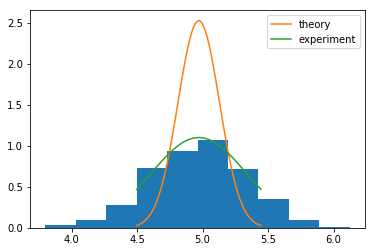

In [209]:
N = 1000
Navg = 100
n, p = 100, .5
sigmaThr = (n*p*(1-p)/N)**.5
samples_bin = np.random.binomial(n,p,(N,Navg))
sigmas = samples_bin.std(axis=1)
sigma_mean = sigmas.mean()
sigma_std = sigmas.std()
plt.hist(sigmas, density=True)
x = np.linspace(sigma_mean-3*sigmaThr,sigma_mean+3*sigmaThr,100)
y = norm.pdf(x,sigma_mean, sigmaThr)
y_exp = norm.pdf(x,sigma_mean, sigma_std)
plt.plot(x,y, label='theory')
plt.plot(x,y_exp, label='experiment')
plt.legend()
plt.show()

The graph illustrates that the distribution of sample variance is not normal (it's empirical density lying far beyond 3 standard deviations).